In [1]:
import glob
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.interpolate import interp1d
from scipy.stats.stats import pearsonr   
import itertools as it
from neupy import algorithms
import Colors

In [2]:
path = '/Users/anna/Dropbox/gastruloids/WritingPapers/code4figures/FigComparisonMouseGastruloid/'

# load data

In [3]:
alltomo = glob.glob('../mG*5d/rawdata/mG*trim_star_spliced.coutt*')
avtomo = ['../average_zscore_mG01mG02mG03mG04mG05.tsv']
filesMicro = glob.glob('../../microarray_GSE39615/mass_signal_convertedgenes.tsv')

In [4]:
genelist_tomo = read_csv('../../../WritingPapers/code4figures/fig1d/fig1d_heatmap_1377corrgenes_SOMclusters.txt', sep = '\t', index_col=0)
corrgenesTOMO = pd.Series([idx.rsplit('__')[0].rsplit('_')[-1] for idx in genelist_tomo.index])
genelist_tomo.index = [idx.rsplit('__')[0].rsplit('_')[-1] for idx in genelist_tomo.index]


In [5]:
genenames = {}

In [6]:
dfs = [read_csv(f, sep = '\t', index_col=0).astype(int) for f in alltomo]
dfsalltomo = []
for df in dfs:
    for idx in df.index:
        genenames[idx.rsplit('__')[0].rsplit('_')[-1]] = idx
    df.index = [idx.rsplit('__')[0].rsplit('_')[-1] for idx in df.index]
    dfsalltomo.append(df)

# read average zscores and rename genes
dfs = [read_csv(f, sep = '\t', index_col=0).T.set_index('x').T for f in avtomo]
znfdfstomo = []
for df in dfs:
    for idx in df.index:
        genenames[idx.rsplit('__')[0].rsplit('_')[-1]] = idx
    df.index = [idx.rsplit('__')[0].rsplit('_')[-1] for idx in df.index]
    znfdfstomo.append(df)

In [7]:
dfmicro = read_csv(filesMicro[0], sep = '\t')
xdfmicro = dfmicro.groupby('gene').aggregate(lambda x: sum(x)/len(x))
psmcols1 = [col for col in dfmicro.columns if 'Pre Somitic Mesoderm' in col and 'rep1' in col]
psmcols2 = [col for col in dfmicro.columns if 'Pre Somitic Mesoderm' in col and 'rep2' in col]
psmcols3 = [col for col in dfmicro.columns if 'Pre Somitic Mesoderm' in col and 'rep3' in col]
ntcols1 = [col for col in dfmicro.columns if 'Neural Tube' in col and 'rep1' in col]
ntcols2 = [col for col in dfmicro.columns if 'Neural Tube' in col and 'rep2' in col]
dfspsm = [xdfmicro[psmcols1[::-1]], xdfmicro[psmcols2[::-1]], xdfmicro[psmcols3[::-1]]]
dfsnt = [xdfmicro[ntcols1[::-1]], xdfmicro[ntcols2[::-1]]]

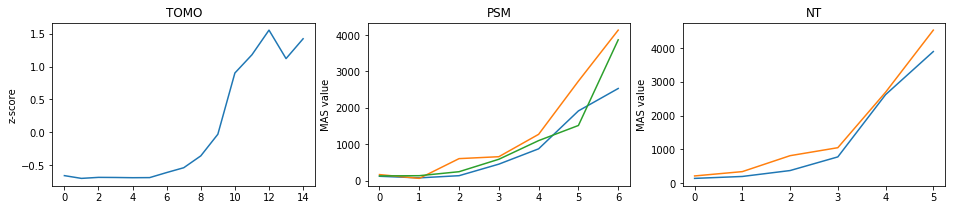

In [8]:
plt.figure(figsize=(16,3))
plt.subplot(131)
for df in znfdfstomo:
    plt.plot(range(len(df.columns)), df.loc['T'])
plt.ylabel('z-score')
plt.title('TOMO')
plt.subplot(132)
for df in dfspsm:
    plt.plot(range(len(df.columns)), df.loc['T'])
plt.title('PSM')
plt.ylabel('MAS value')
plt.subplot(133)
for df in dfsnt:
    plt.plot(range(len(df.columns)), df.loc['T'])
plt.title('NT')
plt.ylabel('MAS value')
#
#plt.savefig(path + 'geneT.pdf', bbox_inches = 'tight')
plt.show()

In [9]:
genelist = pd.Series([g for g in corrgenesTOMO if g in dfspsm[0].index and g in dfsnt[0].index])

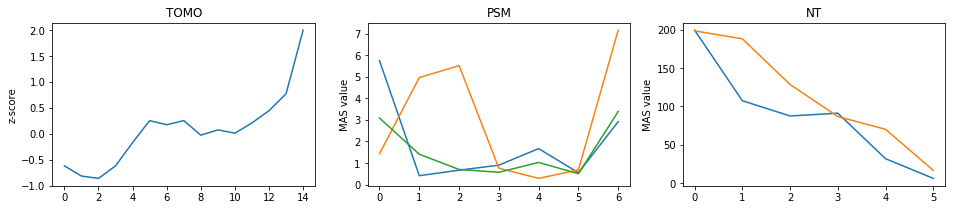

In [10]:
g = 'Sox1'
plt.figure(figsize=(16,3))
plt.subplot(131)
for df in znfdfstomo:
    plt.plot(range(len(df.columns)), df.loc[g])
plt.ylabel('z-score')
plt.title('TOMO')
plt.subplot(132)
for df in dfspsm:
    plt.plot(range(len(df.columns)), df.loc[g])
plt.title('PSM')
plt.ylabel('MAS value')
plt.subplot(133)
for df in dfsnt:
    plt.plot(range(len(df.columns)), df.loc[g])
plt.title('NT')
plt.ylabel('MAS value')
#plt.savefig(path + 'geneSox1.pdf', bbox_inches = 'tight')
plt.show()

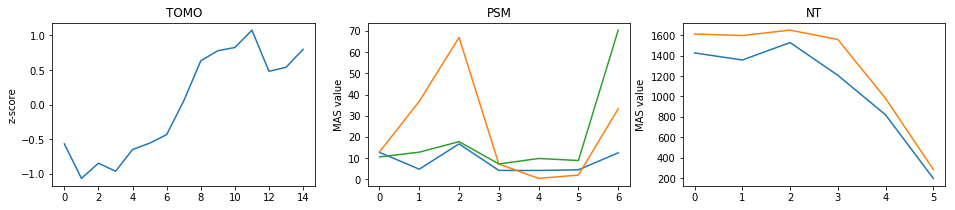

In [11]:
g = 'Sox2'
plt.figure(figsize=(16,3))
plt.subplot(131)
for df in znfdfstomo:
    plt.plot(range(len(df.columns)), df.loc[g])
plt.ylabel('z-score')
plt.title('TOMO')
plt.subplot(132)
for df in dfspsm:
    plt.plot(range(len(df.columns)), df.loc[g])
plt.title('PSM')
plt.ylabel('MAS value')
plt.subplot(133)
for df in dfsnt:
    plt.plot(range(len(df.columns)), df.loc[g])
plt.title('NT')
plt.ylabel('MAS value')
#plt.savefig(path + 'geneSox2.pdf', bbox_inches = 'tight')
plt.show()

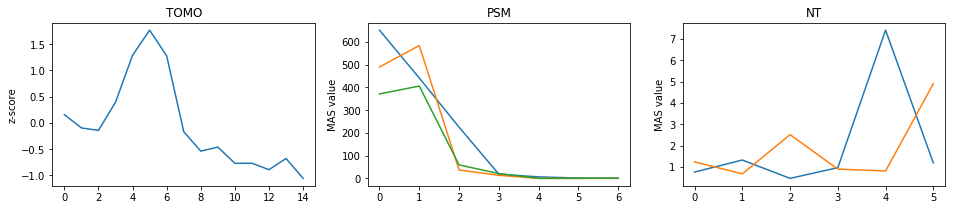

In [12]:
g = 'Uncx'
plt.figure(figsize=(16,3))
plt.subplot(131)
for df in znfdfstomo:
    plt.plot(range(len(df.columns)), df.loc[g])
plt.ylabel('z-score')
plt.title('TOMO')
plt.subplot(132)
for df in dfspsm:
    plt.plot(range(len(df.columns)), df.loc[g])
plt.title('PSM')
plt.ylabel('MAS value')
plt.subplot(133)
for df in dfsnt:
    plt.plot(range(len(df.columns)), df.loc[g])
plt.title('NT')
plt.ylabel('MAS value')
#plt.savefig(path + 'geneUncx.pdf', bbox_inches = 'tight')
plt.show()

# somitogenesis figure

In [13]:
g_somito = ['Fgf8', 'Wnt3a', 'T', 'Tbx6','Dll1', 'Lfng', 'Mesp2', 'Ripply2', 'Notch1', 'Aldh1a2', 'Uncx', 'Meox1','Tcf15']

# genes to annotate

In [14]:
g_annotate=['Cdx2','Rspo3','Sox1','Sox2','Wnt3a','Fgf8','Uncx','Aldh1a2',
          'Mesp2','Ripply2','Dppa5a','Gata6','Meox1','Tbx6','T']

# Remove genes in microarray data

In [15]:
def removeGenes(df):
    genes = ['ERCC','chrM', 'Kcnq1ot1', 'Mir5109', 'Lars2','Malat1', 'Rn45s', 'Rpl', 'Rps','__MT']
    exclude = [idx for idx in df.index for g in genes if g in idx]
    return df.loc[[idx for idx in df.index if idx not in exclude]]

def removeGmGenes(df):
    g = []
    for idx in df.index:
        if 'Gm' in idx:
            gid = idx.rsplit('Gm')[1].rsplit('__')[0]
            if sum([n in [str(r) for r in range(10)] for n in gid]) == len(gid):
                g.append(idx)
    return df.loc[[idx for idx in df.index if idx not in g]]

In [16]:
fdfsalltomo = [removeGmGenes(removeGenes(df)) for df in dfsalltomo]
fdfspsm = [removeGmGenes(removeGenes(df)) for df in dfspsm]
fdfsnt = [removeGmGenes(removeGenes(df)) for df in dfsnt]

In [17]:
fdfsalltomo = [df.loc[df.index[df.sum(axis=1)>0]] for df in fdfsalltomo]
fdfspsm = [df.loc[df.index[df.sum(axis=1)>0]] for df in fdfspsm]
fdfsnt = [df.loc[df.index[df.sum(axis=1)>0]] for df in fdfsnt]

# Genes missing in one or the other datasets

In [18]:
# in raw data
genesalltomo = list(set([g for g in df.index for df in fdfsalltomo]))
genesallmicro = list(set([g for g in df.index for df in fdfspsm+fdfsnt]))
genesallpsm = list(set([g for g in df.index for df in fdfspsm]))
genesallnt = list(set([g for g in df.index for df in fdfsnt]))
len(genesalltomo), len(genesallmicro), len(genesallpsm), len(genesallnt)

(20080, 20567, 20080, 20080)

In [19]:
gboth = []
gtomo = []
gmicro = []
for g in set(genesalltomo+genesallmicro):
    if g in genesalltomo and g in genesallmicro:
        gboth.append(g)
    elif g in genesalltomo and g not in genesallmicro:
        gtomo.append(g)
    elif g not in genesalltomo and g in genesallmicro:
        gmicro.append(g)
len(gboth), len(gtomo), len(gmicro)

(16452, 3628, 4115)

In [20]:
pd.Series(gtomo).to_csv(path + 'rawgenes_onlyTomo.tsv', index = None)
pd.Series(gmicro).to_csv(path + 'rawgenes_onlyMicroarray.tsv', index = None)

# Normalization of microarray data

In [21]:
nfdfspsm = [df.sum().mean()*df/df.sum() for df in fdfspsm]
nfdfsnt = [df.sum().mean()*df/df.sum() for df in fdfsnt]

# z-scores

In [22]:
def zscore(df):
    df = df.loc[df.index[df.sum(axis=1)>0]]
    zdf = df.T
    zdf = (zdf-zdf.mean())/zdf.std()
    zdf = zdf.T
    return zdf

In [23]:
znfdfspsm = [zscore(df) for df in nfdfspsm]
znfdfsnt = [zscore(df) for df in nfdfsnt]

In [24]:
def scalezscore(zdf):
    df  = ((zdf.T>=0)*zdf.T/zdf.max(axis=1) + (zdf.T<0)*zdf.T/abs(zdf.min(axis=1))).T
    return df

In [25]:
sznfdfstomo = [scalezscore(df) for df in znfdfstomo]
sznfdfspsm = [scalezscore(df) for df in znfdfspsm]
sznfdfsnt = [scalezscore(df) for df in znfdfsnt]

# Background model for correlations

In [26]:
def simulationCorrelations(n1, n2, N = 1000, ths = [0.05,0.01,0.005,0.001], seed = 123456):
    x1 = np.linspace(0,1,n1)
    x2 = np.linspace(0,1,n2)
    ps = [0 for i in range(N)]
    np.random.seed(seed)
    for i in range(N):
        d1 = np.random.rand(n1)
        d2 = np.random.rand(n2)

        id2 = interp1d(x2, d2, kind='quadratic')
        ps[i] = pearsonr(d1, id2(x1))[0]
    hist = np.histogram(ps, bins = 100, normed=True)
    hdf = pd.DataFrame({'prob': hist[0], 'corr': [hist[1][i:i+2].mean() for i in range(len(hist[0]))]})
    dx = hdf.loc[1,'corr']-hdf.loc[0,'corr']
    hdf['cum'] = hdf['prob'].cumsum()*dx
    canti = {th: hdf.loc[hdf[hdf['cum']<=th].index[-1], 'corr'] for th in ths}
    ccorr = {th: hdf.loc[hdf[hdf['cum']>=1-th].index[0], 'corr'] for th in ths}
    return ps, canti, ccorr

In [27]:
thprob, thcanti, thccorr = simulationCorrelations(7, 7, N = 10000, seed = 5716809)

/Users/anna/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


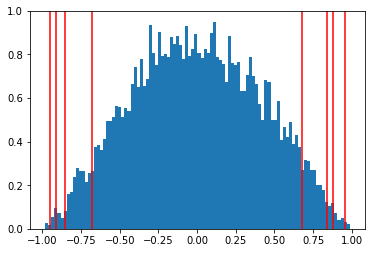

In [28]:
plt.hist(thprob, bins = 100, normed=True)
for pv in thcanti:
    plt.axvline(thcanti[pv], c= 'r')
    plt.axvline(thccorr[pv], c= 'r')
plt.show()

# Reproducible genes in PSM

In [29]:
def geneCorrelation(df1, df2):
    x1 = 1.0*np.arange(len(df1.columns))/(len(df1.columns)-1)
    x2 = 1.0*np.arange(len(df2.columns))/(len(df2.columns)-1)
    cnt = Counter(list(df1.index) + list(df2.index))
    genes = [g for g in cnt if cnt[g] == 2]
    
    cdf = pd.Series(0, index = genes)
    for g in genes:
        idf2 = interp1d(x2, df2.loc[g].values, kind='quadratic')
        cdf.loc[g] = pearsonr(df1.loc[g], idf2(x1))[0]
    return cdf

In [30]:
autoPSMdf = {i: {j: 0 for j in range(len(znfdfspsm))} for i in range(len(znfdfspsm))}
for i1, i2 in it.combinations(range(len(znfdfspsm)),2):
    print i1, i2
    autoPSMdf[i1][i2] = geneCorrelation(znfdfspsm[i1], znfdfspsm[i2])
    autoPSMdf[i2][i1] = geneCorrelation(znfdfspsm[i2], znfdfspsm[i1])  

0 1
0 2
1 2


In [31]:
aPSMgenes = {pv: [] for pv in thccorr}
for pv in thccorr:
    for i1, i2 in it.combinations(range(len(znfdfspsm)),2):
        print i1, i2
        aPSMgenes[pv] += list(autoPSMdf[i1][i2][autoPSMdf[i1][i2] > thccorr[pv]].index)
    aPSMgenes[pv] = [g for g in Counter(aPSMgenes[pv]) if Counter(aPSMgenes[pv])[g]>=2]


0 1
0 2
1 2
0 1
0 2
1 2
0 1
0 2
1 2
0 1
0 2
1 2


In [32]:
{pv: len(aPSMgenes[pv]) for pv in aPSMgenes}

{0.001: 112, 0.005: 492, 0.01: 745, 0.05: 2094}

In [33]:
common_aPSMgenes = {pv: [g for g in set(list(genelist)+aPSMgenes[pv]) if g in list(genelist) and g in aPSMgenes[pv]] for pv in aPSMgenes}

In [34]:
{pv: len(common_aPSMgenes[pv]) for pv in common_aPSMgenes}

{0.001: 53, 0.005: 175, 0.01: 236, 0.05: 485}

In [35]:
def average_dfs(dfs):
    if len(set([len(df.columns) for df in znfdfspsm])) != 1:
        return 'error'
    if not all([all(df.index == dfs[0].index) for df in dfs]):
        return 'error'
    mdf = pd.DataFrame({i: {g: np.mean([df.iloc[:,i][g] for df in dfs]) for g in dfs[0].index} for i in range(len(dfs[0].columns))})
    return mdf

In [36]:
av_znfdfspsm = average_dfs(znfdfspsm)

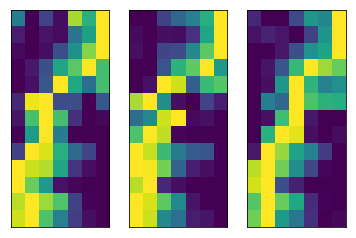

In [37]:
for i, df in enumerate(znfdfspsm):
    plt.subplot(1,len(znfdfspsm),i+1)
    plt.imshow(scalezscore(df.loc[g_somito]), aspect = 'auto')
    plt.xticks([]); plt.yticks([])
#plt.savefig('/Users/anna/Dropbox/gastruloids/WritingPapers/code4figures/figSomitogenesis/PSM-replicates-somito.pdf', bbox_inches = 'tight')
plt.show()

# Correlations between gene expression patterns

In [38]:
def geneCorrelation(df1, df2):
    df1 = df1.groupby(df1.index).aggregate(np.mean)
    df2 = df2.groupby(df2.index).aggregate(np.mean)
    x1 = 1.0*np.arange(len(df1.columns))/(len(df1.columns)-1)
    x2 = 1.0*np.arange(len(df2.columns))/(len(df2.columns)-1)
    cnt = Counter(list(df1.index) + list(df2.index))
    genes = [g for g in cnt if cnt[g] == 2]
    
    cdf = pd.Series(0, index = genes)
    for g in genes:
        idf2 = interp1d(x2, df2.loc[g].values, kind='quadratic')
        cdf.loc[g] = pearsonr(df1.loc[g], idf2(x1))[0]
    return cdf

In [39]:
ctomoavPSMdf = pd.DataFrame({'1': geneCorrelation(znfdfstomo[0], av_znfdfspsm), 
                             '2': geneCorrelation(av_znfdfspsm, znfdfstomo[0])}).mean(axis=1)

# Background model for tomo-microarray correlations

In [40]:
thprobTM, thcantiTM, thccorrTM = simulationCorrelations(znfdfstomo[0].shape[1], av_znfdfspsm.shape[1], N = 10000, seed = 5722809)

In [41]:
thccorrTM

{0.001: 0.70827038301138801,
 0.005: 0.63780498988647605,
 0.01: 0.58495594504279202,
 0.05: 0.42640881051173996}

# Clustering of correlated genes in gastruloids together with PSM

In [42]:
def mergedfs(dfs):
    mdf = dfs[0]
    for df in dfs[1:]:
        mdf = mdf.merge(df, how = 'inner', left_index = True, right_index = True)
        mdf = mdf.fillna(0)
    return mdf

In [43]:
def SOMclustering(df, gridheight = 10, gridwidth = 10, seed = 54321):
    np.random.seed = seed
    GRID_HEIGHT = gridheight
    GRID_WIDTH = gridwidth
    somfun = algorithms.SOFM(
            n_inputs=len(df.columns),
            features_grid=(GRID_HEIGHT, GRID_WIDTH),
            learning_radius=4,
            reduce_radius_after=50,
            step=0.5,
            std=1,
            shuffle_data=True,
            verbose=False)
    somfun.train(np.array(df), epochs = 300)
    clustersr = somfun.predict(np.array(df)).argmax(axis=1)
    cl_genelist_df = pd.Series(clustersr, index = df.index)
    return cl_genelist_df

def hierarchicalClustering(df, cth = 100, plot = False, method = 'ward', metric = 'euclidean', nolabels = 'True'):
    Z = linkage(df, method=method, metric = metric)
    dg = dendrogram(Z, no_labels=nolabels, color_threshold=cth, no_plot = np.invert(plot))
    plt.show()
    return Z, dg

def getClusterByColor(dg, labels):
    kk = []
    ii = 0
    cluster = 0
    color = dg['color_list'][0]
    clusters = {cluster: []}
    for i in range(len(dg['icoord'])):
        v = dg['icoord'][i]
        for j in [0,2]:
            vj = int(round((v[j]-5.)/10))
            if (v[j]-5.)/10 == vj and vj not in kk:
                kk.append(vj)
                if dg['color_list'][i] == color:
                    clusters[cluster].append(labels[dg['leaves'][vj]])
                else:
                    color = dg['color_list'][i]
                    cluster += 1
                    clusters[cluster] = [labels[dg['leaves'][vj]]]
    return clusters

def comboCluster(df, genes, gridheight = 10, gridwidth = 10, cth = 100, plot = True, method = 'ward', metric = 'euclidean', seed = 12345, nolabels = 'True'):
    somcl = SOMclustering(df.loc[genes], gridheight = gridheight, gridwidth = gridwidth, seed = seed)
    mdf_som = pd.DataFrame({i: df.loc[somcl[somcl==i].index].mean() for i in set(somcl) })
    Z, dg = hierarchicalClustering(mdf_som.T, cth = cth, plot = plot, method = method, metric = metric, nolabels = nolabels)
    if plot:
        plt.show()
    ghcl = getClusterByColor(dg, list(mdf_som.columns))
    cl_df = pd.DataFrame(somcl, columns = ['som'])
    cl_df['hcl'] = [k for s in cl_df['som'] for k in ghcl.keys() if s in ghcl[k]]
    return cl_df

In [44]:
znfdfstomo[0].columns = [str(c) + '-tomo' for c in znfdfstomo[0].columns]
av_znfdfspsm.columns = [str(c) + '-psm' for c in av_znfdfspsm.columns]
mznfdftomoavpsm = mergedfs(znfdfstomo+[av_znfdfspsm])

In [45]:
{pv: np.sqrt(len(common_aPSMgenes[pv]))*5 for pv in common_aPSMgenes}

{0.001: 36.400549446402593,
 0.005: 66.143782776614756,
 0.01: 76.81145747868608,
 0.05: 110.1135777277262}

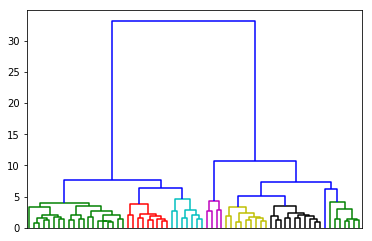

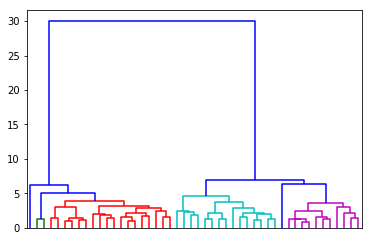

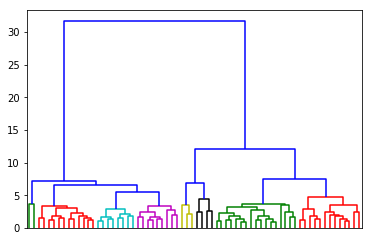

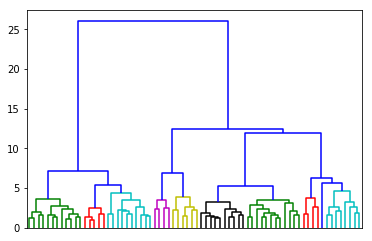

In [46]:
hcldicag = {pv: comboCluster(mznfdftomoavpsm, common_aPSMgenes[pv], cth = 5, gridheight=8, gridwidth=9, seed = 9173510) for pv in common_aPSMgenes}

In [47]:
for pv in hcldicag:
    hcldicag[pv]['corr-PSM'] = ctomoavPSMdf.loc[hcldicag[pv].index]
    hcldicag[pv]['som-tomo'] = genelist_tomo.loc[hcldicag[pv].index, 'som']
    hcldicag[pv]['hcl-tomo'] = genelist_tomo.loc[hcldicag[pv].index, 'hcl']
hcldicag[0.05].head()

,som,hcl,corr-PSM,som-tomo,hcl-tomo
Sorl1,17,5,0.842252,73,1
Tspan5,62,6,0.856303,41,1
Syt7,33,6,0.323494,85,0
Ngfr,66,2,0.566558,79,5
Hes6,57,2,0.613482,2,12


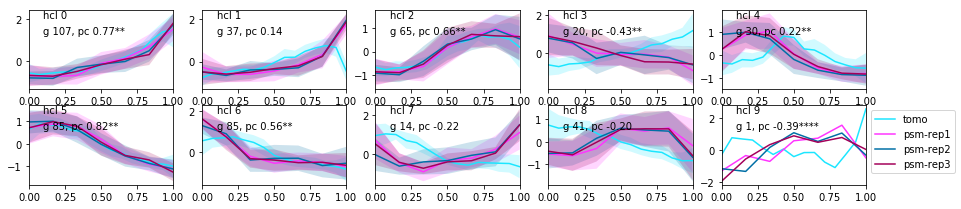

In [48]:
fig = plt.figure(figsize=(15,12))
k = 0; pv = 0.05
for cl in set(hcldicag[pv]['hcl']):
    k += 1
    ax = fig.add_subplot(7,5,k)
    genes = hcldicag[pv][hcldicag[pv]['hcl']==cl].index
    for i, df in enumerate(znfdfstomo+znfdfspsm):
        xra = 1.0*np.arange(len(df.columns))/(len(df.columns)-1)
        mu = df.loc[genes].mean()
        mup = mu + df.loc[genes].std()
        mum = mu - df.loc[genes].std()
       
        ax.plot(xra, mu, c = Colors.colors[i+1])
        ax.fill_between(xra, mup, mum, facecolor=Colors.colors[i+1], interpolate=True, alpha = 0.2)
    corrs = hcldicag[pv]['corr-PSM'].loc[genes]
    cp = '{0:.2f}'.format(corrs.mean())
    title1 = 'hcl ' + str(cl) 
    title2 = 'g ' + str(len(genes)) + ', pc '+ cp      
 
    if sum(corrs>=thccorrTM[pv]) >= int(thccorrTM[pv]*len(genes)):
        title2 += '**'
    if sum(corrs<=thcantiTM[pv]) >= -int(thcantiTM[pv]*len(genes)):
        title2 += '**'
    
    ax.text(0.1,.9, title1, horizontalalignment='left', transform=ax.transAxes)
    ax.text(0.1,.7, title2, horizontalalignment='left', transform=ax.transAxes)
    
    if cl == hcldicag[pv]['hcl'].max():
        plt.legend(['tomo', 'psm-rep1', 'psm-rep2', 'psm-rep3'], loc = 2, bbox_to_anchor = (1,1))
    
    plt.xlim(0,1)
#plt.savefig(path+'/geneexpr_tomoVSpsm_hSOM.pdf', bbox_inches = 'tight')
plt.show()

/Users/anna/anaconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


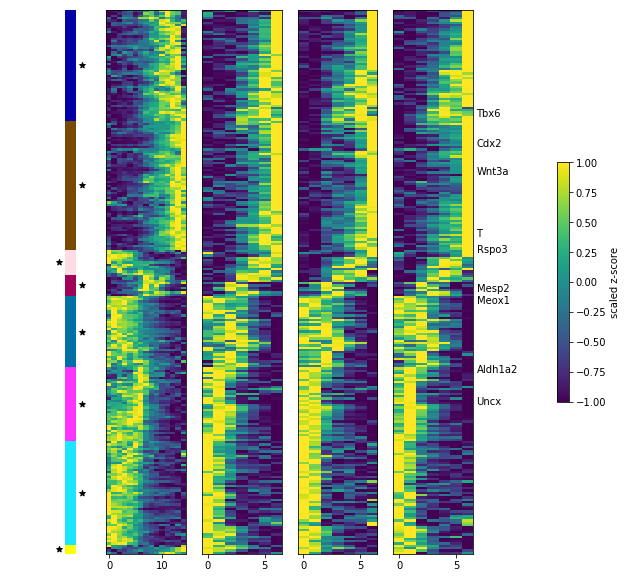

In [49]:
plt.figure(figsize=(10,10))
pv = 0.01

gene_order = hcldicag[pv].sort_values(by=['hcl','som','hcl-tomo']).index

plt.subplot(1,len(sznfdfstomo+sznfdfspsm)+2,1, frameon = False)

y0 = 0; z0 = 0; xb = 4 # 3
for i in set(hcldicag[pv]['hcl']):
    y = 1.0*hcldicag[pv][hcldicag[pv]['hcl'] == i].shape[0]/hcldicag[pv].shape[0]
    plt.bar([xb], [y], bottom = y0, width = 0.3, color = Colors.colors[i])
    corrs = hcldicag[pv][hcldicag[pv]['hcl']==i]['corr-PSM']        
    if sum(corrs>=thccorrTM[0.05]) >= int(thccorrTM[0.05]*len(corrs)):
        plt.scatter([xb+0.3], [y0+0.5*y], marker = '*', c= 'k')
    if sum(corrs<= thcantiTM[0.05]) >= -int(thcantiTM[0.05]*len(corrs)):
        plt.scatter([xb-0.3], [y0+0.5*y], marker = '*', c= 'k')     
    y0 += y   
    
plt.yticks([]); plt.xticks([])
plt.ylim(0,1)
plt.xlim(2.5,4.5)

for i, df in enumerate(sznfdfstomo+sznfdfspsm):
    plt.subplot(1,len(sznfdfstomo+sznfdfspsm)+2,i+2)
    plt.imshow(df.loc[gene_order][::-1], aspect = 'auto')
    plt.yticks([])
    if i == len(sznfdfstomo+sznfdfspsm)-1:
        plt.tick_params(axis='y', labelleft='off', labelright='on', length = 0)
        plt.yticks(range(len(gene_order)), [g.rsplit('__')[0] if g in g_annotate else '' for g in gene_order[::-1]])

plt.subplot(1,len(sznfdfstomo+sznfdfspsm)+2, len(sznfdfstomo+sznfdfspsm)+2, frameon = False)
plt.xticks([]); plt.yticks([])
plt.colorbar(label = 'scaled z-score')

# plt.savefig(path+'/heatmap_tomoVSpms_hSOM.pdf', bbox_inches = 'tight')
plt.show()

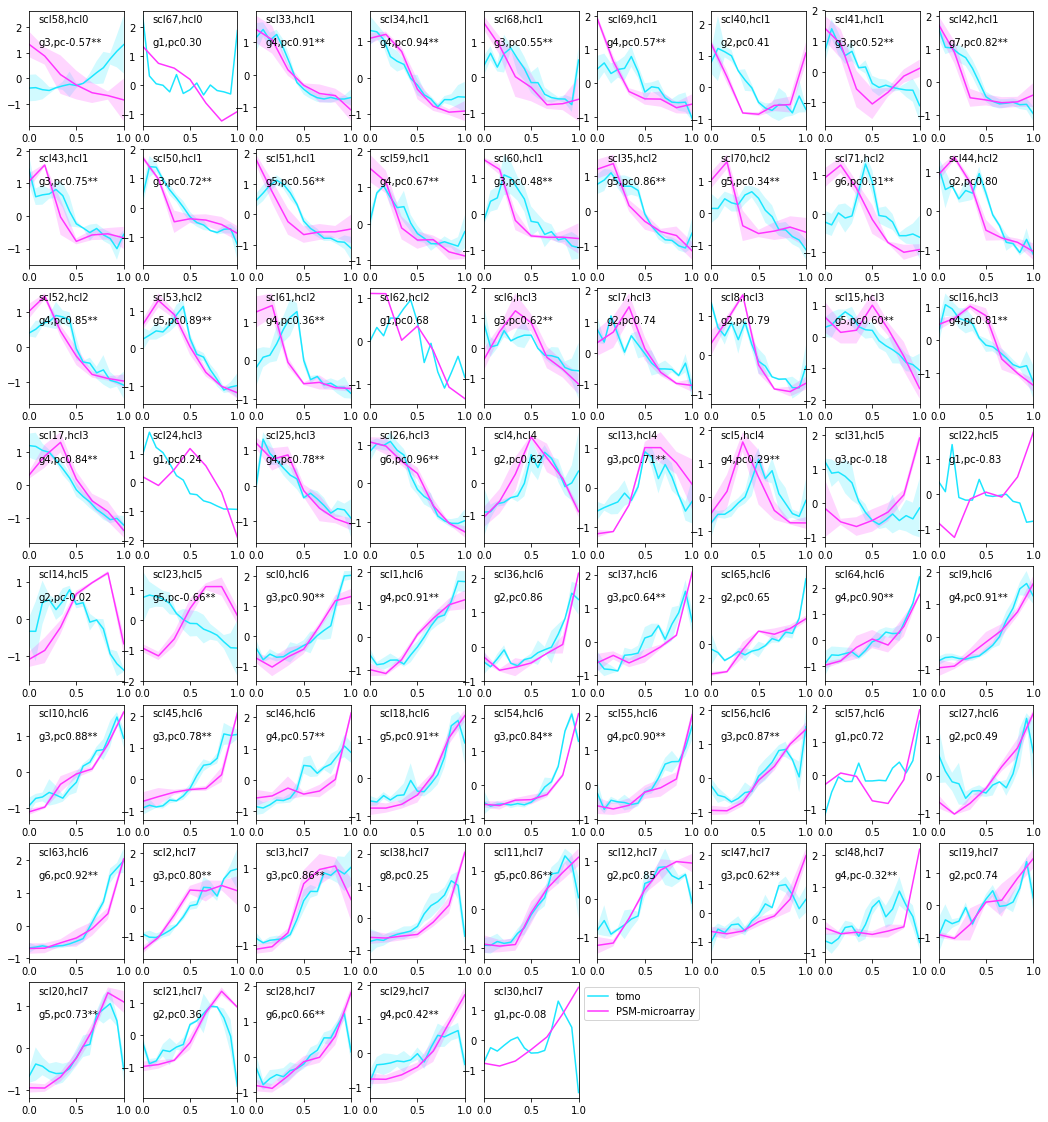

In [50]:
j = 0
fig = plt.figure(figsize=(18,20))
for hcl in set(hcldicag[pv]['hcl']):
    for cl in set(hcldicag[pv][hcldicag[pv]['hcl']==hcl]['som']):
        j += 1
        ax = fig.add_subplot(8,9,j)
        genes = hcldicag[pv][hcldicag[pv]['som']==cl].index
        for i, df in enumerate(znfdfstomo+[av_znfdfspsm]):
            xra = 1.0*np.arange(len(df.columns))/(len(df.columns)-1)
            mu = df.loc[genes].mean()
            mup = mu + df.loc[genes].std()
            mum = mu - df.loc[genes].std()

            ax.plot(xra, mu, c = Colors.colors[i+1])
            ax.fill_between(xra, mup, mum, facecolor=Colors.colors[i+1], interpolate=True, alpha = 0.2)
            
        corrs = hcldicag[pv]['corr-PSM'].loc[genes]
        cp = '{0:.2f}'.format(corrs.mean())
        title1 = 'scl' + str(cl) + ',hcl' + str(hcl) 
        title2 = 'g' + str(len(genes)) + ',pc'+ cp 
        if sum(corrs >= thccorrTM[0.05]) >= int( thccorrTM[0.05]*len(genes)) and not sum(corrs <= thcantiTM[0.05]) >= -int(thcantiTM[0.05]*len(genes)):
            title2 += '**'
        if sum(corrs <= thcantiTM[0.05]) >= -int(thcantiTM[0.05]*len(genes)) and not sum(corrs >= thccorrTM[0.05]) >= int( thccorrTM[0.05]*len(genes)):
            title2 += '**'
        ax.text(0.1,.9, title1, horizontalalignment='left', transform=ax.transAxes)
        ax.text(0.1,.7, title2, horizontalalignment='left', transform=ax.transAxes)
        
        plt.xlim(0,1)
plt.legend(['tomo', 'PSM-microarray'], loc = 2, bbox_to_anchor = (1,1))
# plt.savefig(path+'/geneexpr_tomoVSpsm_commonGenes_SOM.pdf', bbox_inches = 'tight')
plt.show()

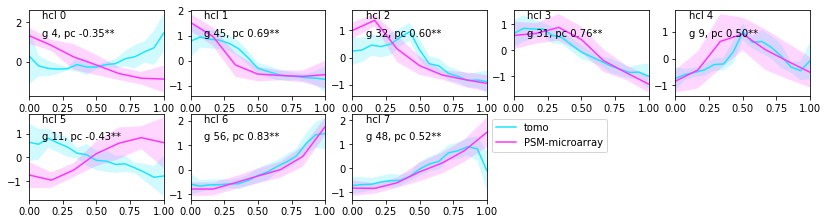

In [51]:
fig = plt.figure(figsize=(14,13))
k = 0; pv = 0.01

for cl in set(hcldicag[pv]['hcl']):
    k += 1
    ax = fig.add_subplot(7,5,k)
    genes = hcldicag[pv][hcldicag[pv]['hcl']==cl].index
    for i, df in enumerate(znfdfstomo+[av_znfdfspsm]):
        xra = 1.0*np.arange(len(df.columns))/(len(df.columns)-1)
        mu = df.loc[genes].mean()
        mup = mu + df.loc[genes].std()
        mum = mu - df.loc[genes].std()
       
        ax.plot(xra, mu, c = Colors.colors[i+1])
        ax.fill_between(xra, mup, mum, facecolor=Colors.colors[i+1], interpolate=True, alpha = 0.2)
    corrs = hcldicag[pv]['corr-PSM'].loc[genes]
    cp = '{0:.2f}'.format(corrs.mean())
    title1 = 'hcl ' + str(cl) 
    title2 = 'g ' + str(len(genes)) + ', pc '+ cp      
 
    if sum(corrs>=thccorrTM[0.05]) >= int(thccorrTM[0.05]*len(genes)) and not sum(corrs<=thcantiTM[0.05]) >= -int(thcantiTM[0.05]*len(genes)):
        title2 += '**'
    if sum(corrs<=thcantiTM[0.05]) >= -int(thcantiTM[0.05]*len(genes)) and not sum(corrs>=thccorrTM[0.05]) >= int(thccorrTM[0.05]*len(genes)):
        title2 += '**'
    
    ax.text(0.1,.9, title1, horizontalalignment='left', transform=ax.transAxes)
    ax.text(0.1,.7, title2, horizontalalignment='left', transform=ax.transAxes)
    
    plt.xlim(0,1)
    
plt.legend(['tomo', 'PSM-microarray'], loc = 2, bbox_to_anchor = (1,1))

#plt.savefig(path+'/geneexpr_tomoVSpsm_commonGenes_hSOM.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
pv = 1.

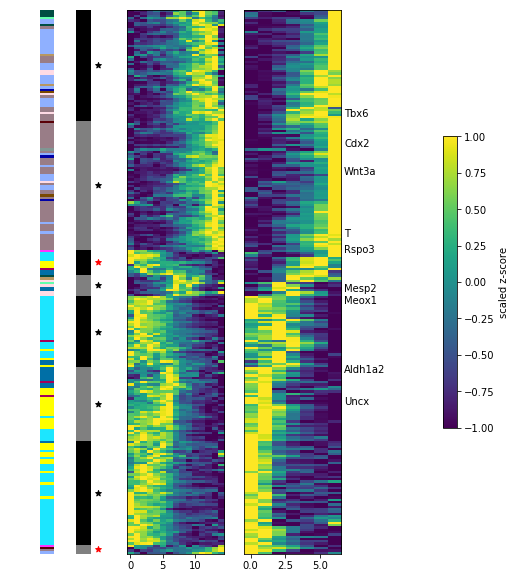

In [73]:
plt.figure(figsize=(8,10))

gene_order = hcldicag[pv].sort_values(by=['hcl','som', 'hcl-tomo']).index

plt.subplot(1,4,1, frameon = False)

pv_commonGenes = 0.01
pv_correlations = 0.05

y0 = 0; z0 = 0; xb = 3.25
for g in gene_order:
    y = 1.0/len(gene_order)
    c = hcldicag[pv].loc[g,'hcl-tomo']
    plt.bar([xb], [y], bottom = y0, width = 0.3, color = Colors.colors[c])
           
    y0 += y 

y0 = 0; z0 = 0; xb = 4 
for i in set(hcldicag[pv_commonGenes]['hcl']):
    y = 1.0*hcldicag[pv_commonGenes][hcldicag[pv_commonGenes]['hcl'] == i].shape[0]/hcldicag[pv_commonGenes].shape[0]
    c = 'gray' if np.mod(i,2)==0 else 'black'
    plt.bar([xb], [y], bottom = y0, width = 0.3, color = c)
    corrs = hcldicag[pv_commonGenes][hcldicag[pv_commonGenes]['hcl']==i]['corr-PSM']
        
    if sum(corrs>=thccorrTM[pv_correlations]) >= int(thccorrTM[pv_correlations]*len(corrs)) and not sum(corrs<= thcantiTM[pv_correlations]) >= -int(thcantiTM[pv_correlations]*len(corrs)):
        plt.scatter([xb+0.3], [y0+0.5*y], marker = '*', c= 'k')
    if sum(corrs<= thcantiTM[pv_correlations]) >= -int(thcantiTM[pv_correlations]*len(corrs)) and not sum(corrs>=thccorrTM[0.05]) >= int(thccorrTM[pv_correlations]*len(corrs)):
        plt.scatter([xb+0.3], [y0+0.5*y], marker = '*', c= 'r')     
    y0 += y   
    
plt.yticks([]); plt.xticks([])
plt.ylim(0,1)
plt.xlim(2.5,4.5)

for i, df in enumerate(sznfdfstomo+[scalezscore(av_znfdfspsm)]):
    plt.subplot(1,4,i+2)
    plt.imshow(df.loc[gene_order][::-1], aspect = 'auto')
    plt.yticks([])

plt.tick_params(axis='y', labelleft='off', labelright='on', length = 0)
plt.yticks(range(len(gene_order)), [g.rsplit('__')[0] if g in g_annotate else '' for g in gene_order[::-1]])

plt.subplot(1,4, 4, frameon = False)
plt.xticks([]); plt.yticks([])
plt.colorbar(label = 'scaled z-score')

plt.savefig(path+'/heatmap_tomoVSpms_commonGenes_hSOM.pdf', bbox_inches = 'tight')
plt.show()

In [53]:
path

'/Users/anna/Dropbox/gastruloids/WritingPapers/code4figures/FigComparisonMouseGastruloid/'

In [60]:
(hcldicag[pv]['hcl']==5).sum(), (hcldicag[pv]['hcl']==0).sum(), len(hcldicag[pv])

(11, 4, 236)

In [63]:
hcldicag[pv].to_csv(path + 'heatmap_tomoVSpms_commonGenes_hSOM.txt' )

# Clustering of correlated genes in gastruloids together with NT

In [ ]:
mznfdftomont = mergedfs(znfdfstomo+znfdfsnt)
mznfdftomoavnt = mergedfs(znfdfstomo+[av_znfdfsnt])

In [ ]:
somcl_genelist_tomont_df = SOMclustering(mznfdftomont.loc[genelist])
somcl_aPSM05genes_tomoavnt_df = SOMclustering(mznfdftomoavnt.loc[common_aNTgenes05], gridheight=8, gridwidth=8)

In [ ]:
print Counter(somcl_genelist_tomont_df).most_common(1), Counter(somcl_genelist_tomont_df).most_common()[-1]
print Counter(somcl_aPSM05genes_tomoavnt_df).most_common(5), Counter(somcl_aPSM05genes_tomoavnt_df).most_common()[-5:]

In [ ]:
mudfgl = pd.DataFrame({i: mznfdftomont.loc[somcl_genelist_tomont_df[somcl_genelist_tomont_df==i].index].mean() for i in set(somcl_genelist_tomont_df) })
mudfag = pd.DataFrame({i: mznfdftomoavnt.loc[somcl_aPSM05genes_tomoavnt_df[somcl_aPSM05genes_tomoavnt_df==i].index].mean() for i in set(somcl_aPSM05genes_tomoavnt_df) })

In [ ]:
hclsomgl = linkage(mudfgl.T, method='ward', metric='euclidean')
hclsomag = linkage(mudfag.T, method='ward', metric='euclidean')
plt.subplot(121)
dggl = dendrogram(hclsomgl, no_labels=True, color_threshold = 4.5) # 5
plt.subplot(122)
dgag = dendrogram(hclsomag, no_labels=True, color_threshold = 3) # 5
plt.show()

In [ ]:
hcldicgl = getClusterByColor(dggl, mudfgl.columns)
hcldicag = getClusterByColor(dgag, mudfag.columns)

In [ ]:
len(hcldicgl), len(hcldicag)

In [ ]:
somcl_genelist_tomont_df = pd.DataFrame(somcl_genelist_tomont_df, columns=['som'])
somcl_genelist_tomont_df['hcl'] = [k for s in somcl_genelist_tomont_df['som'] for k in hcldicgl.keys() if s in hcldicgl[k]]

somcl_aPSM05genes_tomoavnt_df = pd.DataFrame(somcl_aPSM05genes_tomoavnt_df, columns=['som'])
somcl_aPSM05genes_tomoavnt_df['hcl'] = [k for s in somcl_aPSM05genes_tomoavnt_df['som'] for k in hcldicag.keys() if s in hcldicag[k]]

In [ ]:
somcl_genelist_tomont_df['corr-NT'] = [ctomoNTdf.loc[idx,'corr-NT'] for idx in somcl_genelist_tomont_df.index]
somcl_aPSM05genes_tomoavnt_df['corr-NT'] = [ctomoavNTdf.loc[idx] for idx in somcl_aPSM05genes_tomoavnt_df.index]

In [ ]:
somcl_genelist_tomont_df['gene_id'] = [genenames[idx] for idx in somcl_genelist_tomont_df.index]
somcl_aPSM05genes_tomoavnt_df['gene_id'] = [genenames[idx] for idx in somcl_aPSM05genes_tomoavnt_df.index]

In [ ]:
somcl_genelist_tomont_df.to_csv(path+'/geneexpr_tomoVSnt_SOM.txt', sep = '\t')
somcl_aPSM05genes_tomoavnt_df.to_csv(path+'/geneexpr_tomoVSaveragent_SOM.txt', sep = '\t')

In [ ]:
j = 0
fig = plt.figure(figsize=(18,20))
for hcl in set(somcl_genelist_tomont_df['hcl']):
    for cl in set(somcl_genelist_tomont_df[somcl_genelist_tomont_df['hcl']==hcl]['som']):
        j += 1
        ax = fig.add_subplot(10,10,j)
        genes = somcl_genelist_tomont_df[somcl_genelist_tomont_df['som']==cl].index
        for i, df in enumerate(znfdfstomo+znfdfsnt):
            xra = 1.0*np.arange(len(df.columns))/(len(df.columns)-1)
            mu = df.loc[genes].mean()
            mup = mu + df.loc[genes].std()
            mum = mu - df.loc[genes].std()

            ax.plot(xra, mu, c = Colors.colors[i+1])
            ax.fill_between(xra, mup, mum, facecolor=Colors.colors[i+1], interpolate=True, alpha = 0.2)
            
        corrs = somcl_genelist_tomont_df['corr-NT'].loc[genes]
        cp = '{0:.2f}'.format(corrs.mean())
        title1 = 'scl' + str(cl) + ',hcl' + str(hcl) 
        title2 = 'g' + str(len(genes)) + ',pc'+ cp 
        if sum(corrs >= thccorrNT05) >= int(thccorrNT05*len(genes)):
            title2 += '**'
        if sum(corrs <= thcantiNT05) >= -int(thcantiNT05*len(genes)):
            title2 += '**'
        ax.text(0.1,.9, title1, horizontalalignment='left', transform=ax.transAxes)
        ax.text(0.1,.7, title2, horizontalalignment='left', transform=ax.transAxes)
        
        plt.xlim(0,1)
plt.legend(['tomo', 'nt-rep1', 'nt-rep2'], loc = 2, bbox_to_anchor = (1,1))
plt.savefig(path+'/geneexpr_tomoVSnt_SOM.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,12))
k = 0
for cl in set(somcl_genelist_tomont_df['hcl']):
    k += 1
    ax = fig.add_subplot(7,5,k)
    genes = somcl_genelist_tomont_df[somcl_genelist_tomont_df['hcl']==cl].index
    for i, df in enumerate(znfdfstomo+znfdfsnt):
        xra = 1.0*np.arange(len(df.columns))/(len(df.columns)-1)
        mu = df.loc[genes].mean()
        mup = mu + df.loc[genes].std()
        mum = mu - df.loc[genes].std()
       
        ax.plot(xra, mu, c = Colors.colors[i+1])
        ax.fill_between(xra, mup, mum, facecolor=Colors.colors[i+1], interpolate=True, alpha = 0.2)
    corrs = somcl_genelist_tomont_df['corr-NT'].loc[genes]
    cp = '{0:.2f}'.format(corrs.mean())
    title1 = 'hcl ' + str(cl) 
    title2 = 'g ' + str(len(genes)) + ', pc '+ cp      
 
    if sum(corrs>=thccorrNT05) >= int(thccorrNT05*len(genes)):
        title2 += '**'
    if sum(corrs<=thcantiNT05) >= -int(thcantiNT05*len(genes)):
        title2 += '**'
    
    ax.text(0.1,.9, title1, horizontalalignment='left', transform=ax.transAxes)
    ax.text(0.1,.7, title2, horizontalalignment='left', transform=ax.transAxes)
    
    if cl == somcl_genelist_tomont_df['hcl'].max():
        plt.legend(['tomo', 'nt-rep1', 'nt-rep2'], loc = 2, bbox_to_anchor = (1,1))
    
    plt.xlim(0,1)
plt.savefig(path+'/geneexpr_tomoVSnt_hSOM.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))

gene_order = somcl_genelist_tomont_df.sort_values(by=['hcl','som']).index

plt.subplot(1,len(sznfdfstomo+sznfdfsnt)+2,1, frameon = False)

y0 = 0; z0 = 0; xb = 4 # 3
for i in set(somcl_genelist_tomont_df['hcl']):
    y = 1.0*somcl_genelist_tomont_df[somcl_genelist_tomont_df['hcl'] == i].shape[0]/somcl_genelist_tomont_df.shape[0]
    plt.bar([xb], [y], bottom = y0, width = 0.3, color = Colors.colors[i])
    
    corrs = somcl_genelist_tomont_df[somcl_genelist_tomont_df['hcl']==i]['corr-NT']
        
    if sum(corrs>=thccorrNT05) >= int(thccorrNT05*len(corrs)):
        plt.scatter([xb+0.3], [y0+0.5*y], marker = '*', c= 'k')
    if sum(corrs<= thcantiNT05) >= -int(thcantiNT05*len(corrs)):
        plt.scatter([xb-0.3], [y0+0.5*y], marker = '*', c= 'k')     
    y0 += y   
    
plt.yticks([]); plt.xticks([])
plt.ylim(0,1)
plt.xlim(2.5,4.5)

for i, df in enumerate(sznfdfstomo+sznfdfsnt):
    plt.subplot(1,len(sznfdfstomo+sznfdfsnt)+2,i+2)
    plt.imshow(df.loc[gene_order][::-1], aspect = 'auto')
    plt.yticks([])
    if i == len(sznfdfstomo+sznfdfsnt)-1:
        plt.tick_params(axis='y', labelleft='off', labelright='on', length = 0)
        plt.yticks(range(len(gene_order)), [g.rsplit('__')[0] if g in g_annotate else '' for g in gene_order[::-1]])

plt.subplot(1,len(sznfdfstomo+sznfdfsnt)+2, len(sznfdfstomo+sznfdfsnt)+2, frameon = False)
plt.xticks([]); plt.yticks([])
plt.colorbar(label = 'scaled z-score')

plt.savefig(path+'/heatmap_tomoVSnt_hSOM.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
j = 0
fig = plt.figure(figsize=(18,20))
for hcl in set(somcl_aPSM05genes_tomoavnt_df['hcl']):
    for cl in set(somcl_aPSM05genes_tomoavnt_df[somcl_aPSM05genes_tomoavnt_df['hcl']==hcl]['som']):
        j += 1
        ax = fig.add_subplot(8,8,j)
        genes = somcl_aPSM05genes_tomoavnt_df[somcl_aPSM05genes_tomoavnt_df['som']==cl].index
        for i, df in enumerate(znfdfstomo+[av_znfdfsnt]):
            xra = 1.0*np.arange(len(df.columns))/(len(df.columns)-1)
            mu = df.loc[genes].mean()
            mup = mu + df.loc[genes].std()
            mum = mu - df.loc[genes].std()

            ax.plot(xra, mu, c = Colors.colors[i+1])
            ax.fill_between(xra, mup, mum, facecolor=Colors.colors[i+1], interpolate=True, alpha = 0.2)
            
        corrs = somcl_aPSM05genes_tomoavnt_df['corr-NT'].loc[genes]
        cp = '{0:.2f}'.format(corrs.mean())
        title1 = 'scl' + str(cl) + ',hcl' + str(hcl) 
        title2 = 'g' + str(len(genes)) + ',pc'+ cp 
        if sum(corrs >= thccorrNT05) >= int(thccorrNT05*len(genes)) and not sum(corrs <= thcantiNT05) >= -int(thcantiNT05*len(genes)):
            title2 += '**'
        if sum(corrs <= thcantiNT05) >= -int(thcantiNT05*len(genes)) and not sum(corrs >= thccorrNT05) >= int(thccorrNT05*len(genes)):
            title2 += '**'
        ax.text(0.1,.9, title1, horizontalalignment='left', transform=ax.transAxes)
        ax.text(0.1,.7, title2, horizontalalignment='left', transform=ax.transAxes)
        
        plt.xlim(0,1)
plt.legend(['tomo', 'NT-microarray'], loc = 2, bbox_to_anchor = (1,1))
plt.savefig(path+'/geneexpr_tomoVSnt_commonGenes_SOM.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(14,13))
k = 0
for cl in set(somcl_aPSM05genes_tomoavnt_df['hcl']):
    k += 1
    ax = fig.add_subplot(7,5,k)
    genes = somcl_aPSM05genes_tomoavnt_df[somcl_aPSM05genes_tomoavnt_df['hcl']==cl].index
    for i, df in enumerate(znfdfstomo+[av_znfdfsnt]):
        xra = 1.0*np.arange(len(df.columns))/(len(df.columns)-1)
        mu = df.loc[genes].mean()
        mup = mu + df.loc[genes].std()
        mum = mu - df.loc[genes].std()
       
        ax.plot(xra, mu, c = Colors.colors[i+1])
        ax.fill_between(xra, mup, mum, facecolor=Colors.colors[i+1], interpolate=True, alpha = 0.2)
    corrs = somcl_aPSM05genes_tomoavnt_df['corr-NT'].loc[genes]
    cp = '{0:.2f}'.format(corrs.mean())
    title1 = 'hcl ' + str(cl) 
    title2 = 'g ' + str(len(genes)) + ', pc '+ cp      
 
    if sum(corrs>=thccorrNT05) >= int(thccorrNT05*len(genes)) and not sum(corrs<=thcantiNT05) >= -int(thcantiNT05*len(genes)):
        title2 += '**'
    if sum(corrs<=thcantiNT05) >= -int(thcantiNT05*len(genes)) and not sum(corrs>=thccorrNT05) >= int(thccorrNT05*len(genes)):
        title2 += '**'
    
    ax.text(0.1,.9, title1, horizontalalignment='left', transform=ax.transAxes)
    ax.text(0.1,.7, title2, horizontalalignment='left', transform=ax.transAxes)
    
    plt.xlim(0,1)
    
plt.legend(['tomo', 'NT-microarray'], loc = 2, bbox_to_anchor = (1,1))

plt.savefig(path+'/geneexpr_tomoVSnt_commonGenes_hSOM.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
plt.figure(figsize=(8,10))

gene_order = somcl_aPSM05genes_tomoavnt_df.sort_values(by=['hcl','som']).index

plt.subplot(1,4,1, frameon = False)

y0 = 0; z0 = 0; xb = 4 # 3
for i in set(somcl_aPSM05genes_tomoavnt_df['hcl']):
    y = 1.0*somcl_aPSM05genes_tomoavnt_df[somcl_aPSM05genes_tomoavnt_df['hcl'] == i].shape[0]/somcl_aPSM05genes_tomoavnt_df.shape[0]
    plt.bar([xb], [y], bottom = y0, width = 0.3, color = Colors.colors[i])
    
    corrs = somcl_aPSM05genes_tomoavnt_df[somcl_aPSM05genes_tomoavnt_df['hcl']==i]['corr-NT']
        
    if sum(corrs>=thccorrNT05) >= int(thccorrNT05*len(corrs)) and not sum(corrs<= thcantiNT05) >= -int(thcantiNT05*len(corrs)):
        plt.scatter([xb+0.3], [y0+0.5*y], marker = '*', c= 'k')
    if sum(corrs<= thcantiNT05) >= -int(thcantiNT05*len(corrs)) and not sum(corrs>=thccorrNT05) >= int(thccorrNT05*len(corrs)):
        plt.scatter([xb-0.3], [y0+0.5*y], marker = '*', c= 'k')     
    y0 += y   
    
plt.yticks([]); plt.xticks([])
plt.ylim(0,1)
plt.xlim(2.5,4.5)

for i, df in enumerate(sznfdfstomo+[scalezscore(av_znfdfsnt)]):
    plt.subplot(1,4,i+2)
    plt.imshow(df.loc[gene_order][::-1], aspect = 'auto')
    plt.yticks([])

plt.tick_params(axis='y', labelleft='off', labelright='on', length = 0)
plt.yticks(range(len(gene_order)), [g.rsplit('__')[0] if g in g_annotate else '' for g in gene_order[::-1]])

plt.subplot(1,4, 4, frameon = False)
plt.xticks([]); plt.yticks([])
plt.colorbar(label = 'scaled z-score')

plt.savefig(path+'/heatmap_tomoVSnt_commonGenes_hSOM.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
pd.Series(common_aPSMgenes01).to_csv('common_genes_PSM_p01.txt', index = None)
pd.Series(common_aPSMgenes05).to_csv('common_genes_PSM_p05.txt', index = None)
av_znfdfspsm.loc[somcl_aPSM05genes_tomoavpsm_df.sort_values(by=['hcl','som']).index].to_csv('av_PSM_relevantGenes.txt', sep = '\t')

In [ ]:
pd.Series(common_aNTgenes01).to_csv('common_genes_NT_p01.txt', index = None)
pd.Series(common_aNTgenes05).to_csv('common_genes_NT_p05.txt', index = None)
av_znfdfsnt.loc[somcl_aPSM05genes_tomoavnt_df.sort_values(by=['hcl','som']).index].to_csv('av_NT_relevantGenes.txt', sep = '\t')

In [ ]:
len(somcl_aPSM05genes_tomoavnt_df), len(somcl_aPSM05genes_tomoavpsm_df)

In [ ]:
pd.Series(genenames).to_csv('genename_geneID_conversion.txt', sep = '\t')

In [ ]:
# for my talk
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.bar(3*np.arange(len(nfdfspsm[0].columns)), nfdfspsm[0].loc['T'])
plt.bar(3*np.arange(len(nfdfspsm[0].columns))+1, nfdfspsm[1].loc['T'])
plt.bar(3*np.arange(len(nfdfspsm[0].columns))+2, nfdfspsm[2].loc['T'])
plt.legend(['rep 1', 'rep 2', 'rep 3'])
plt.title('PSM')
plt.xticks([0,3,6,9,12,15,18,21], [1,2,3,4,5,6,7])
plt.ylabel('MAS value')
plt.xlabel('sections')
plt.ylim(0,4400)

plt.subplot(122)
plt.bar(2*np.arange(len(nfdfsnt[0].columns)), nfdfsnt[0].loc['T'])
plt.bar(2*np.arange(len(nfdfsnt[1].columns))+1, nfdfsnt[1].loc['T'])
plt.legend(['rep 1', 'rep 2', 'rep 3'])
plt.title('NT')
plt.xticks([0,2,4,6,8,10,12], [1,2,3,4,5,6])
plt.xlabel('sections')
plt.ylim(0,4400)

plt.savefig('geneT-microarray.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# for my talk
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.bar(3*np.arange(len(nfdfspsm[0].columns)), nfdfspsm[0].loc['Pax6'])
plt.bar(3*np.arange(len(nfdfspsm[0].columns))+1, nfdfspsm[1].loc['Pax6'])
plt.bar(3*np.arange(len(nfdfspsm[0].columns))+2, nfdfspsm[2].loc['Pax6'])
plt.legend(['rep 1', 'rep 2', 'rep 3'])
plt.title('PSM')
plt.xticks([0,3,6,9,12,15,18,21], [1,2,3,4,5,6,7])
plt.ylabel('MAS value')
plt.xlabel('sections')
plt.ylim(0,120)

plt.subplot(122)
plt.bar(2*np.arange(len(nfdfsnt[0].columns)), nfdfsnt[0].loc['Pax6'])
plt.bar(2*np.arange(len(nfdfsnt[1].columns))+1, nfdfsnt[1].loc['Pax6'])
plt.legend(['rep 1', 'rep 2', 'rep 3'])
plt.title('NT')
plt.ylim(0,120)

plt.savefig('genePax6-microarray.pdf', bbox_inches = 'tight')

plt.show()